In [1]:
tmp = pd.read_pickle('./data/boulder_co.pcl')
tmp['rain_duration'] = (tmp.P*0.6890) + 1.0826 # from CRN hourly rain duration computation
tmp.loc[tmp.rain_duration>24,'rain_duration'] = 24
crn = pd.DataFrame(tmp[['P','Tmax','Tmin','Tave_mod','rain_duration']])

In [2]:
crn.columns = ['P','Tmax','Tmin','Tave','rain_duration']
crn.P *= 0.001 # mm to m

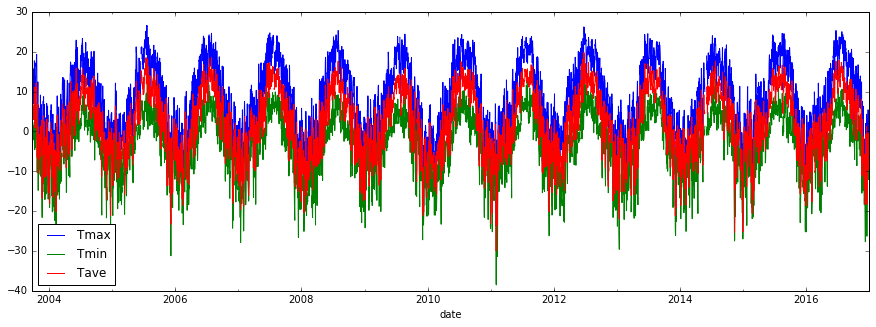

In [3]:
crn[['Tmax','Tmin','Tave']].plot(figsize=(15,5))

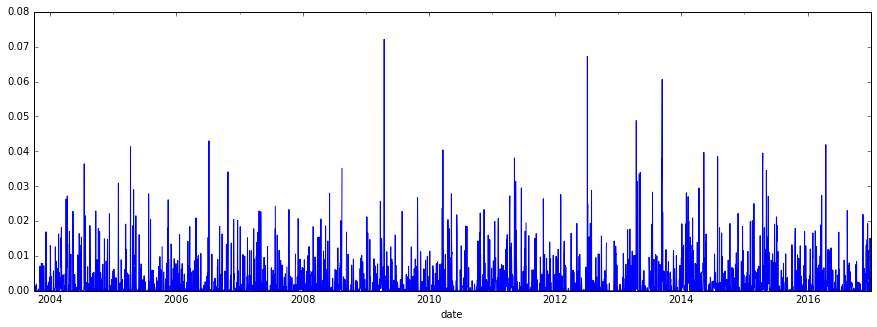

In [4]:
crn['P'].plot(figsize=(15,5))

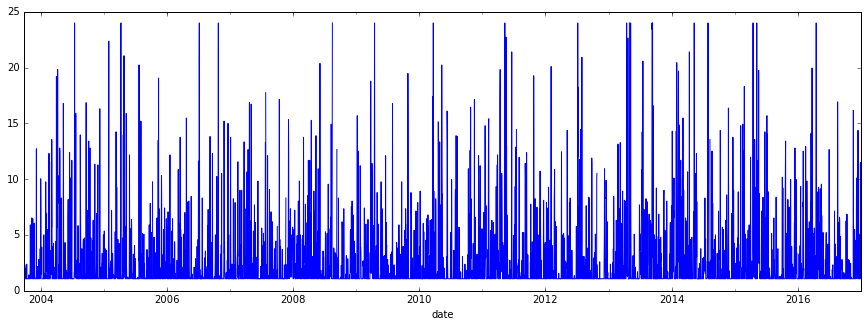

In [5]:
crn['rain_duration'].plot(figsize=(15,5))

### Generate Standard Forcing Data

In [6]:
print crn.index.min()

2003-09-27 00:00:00


### Generate Spinup Forcing for at least 200 years

In [7]:
nonleap = crn.loc['2009-10-1':'2010-09-30'].copy().reset_index()
leap = crn.loc['2009-10-1':'2010-10-01'].copy().reset_index()
year_end = crn.loc['2009-10-1':'2010-10-15'].copy().reset_index() # not a leap year

In [8]:
strt = '1800-10-1'

tmp = pd.concat([nonleap,
                nonleap,
                nonleap,
                leap,
                nonleap,
                nonleap,
                nonleap,
                leap],axis=0)

out = pd.concat([tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,
                 tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,
                 tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,
                 tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,
                 tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp,tmp])

out.index = pd.period_range(start=strt,freq='D',periods=len(out))

In [9]:
print out.index.min()

1800-10-01
